# **MÓDULO 15 - AULA 1**
# Introdução a Análise exploratória dos dados

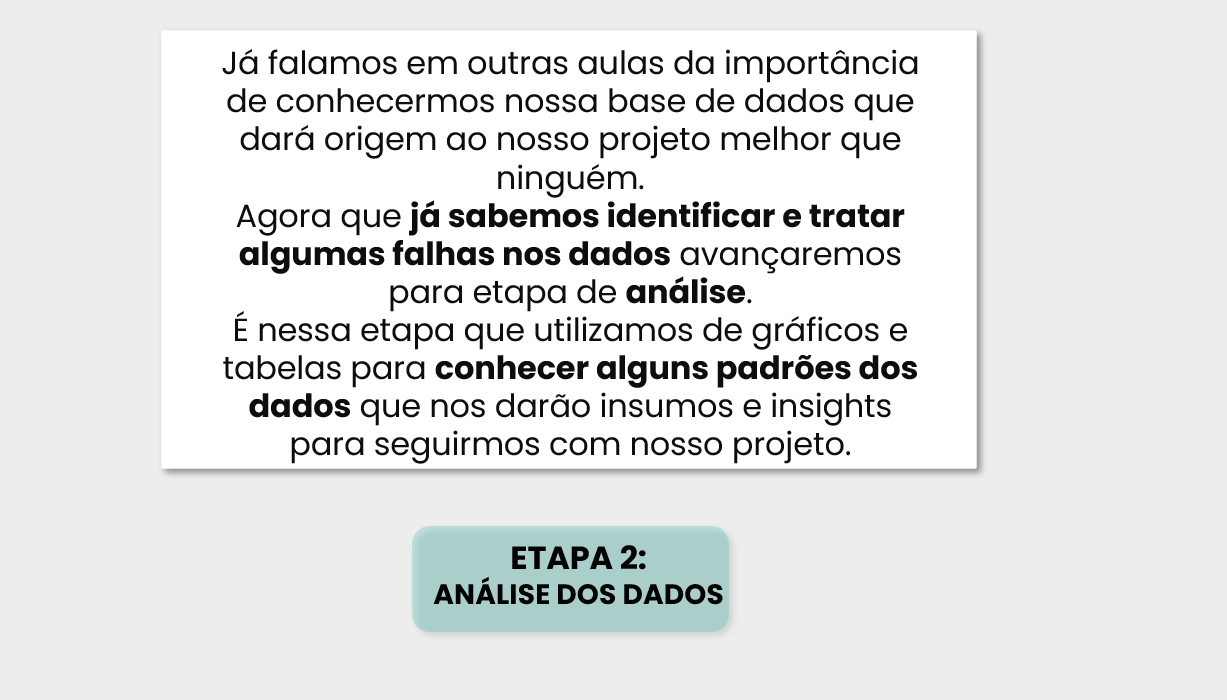

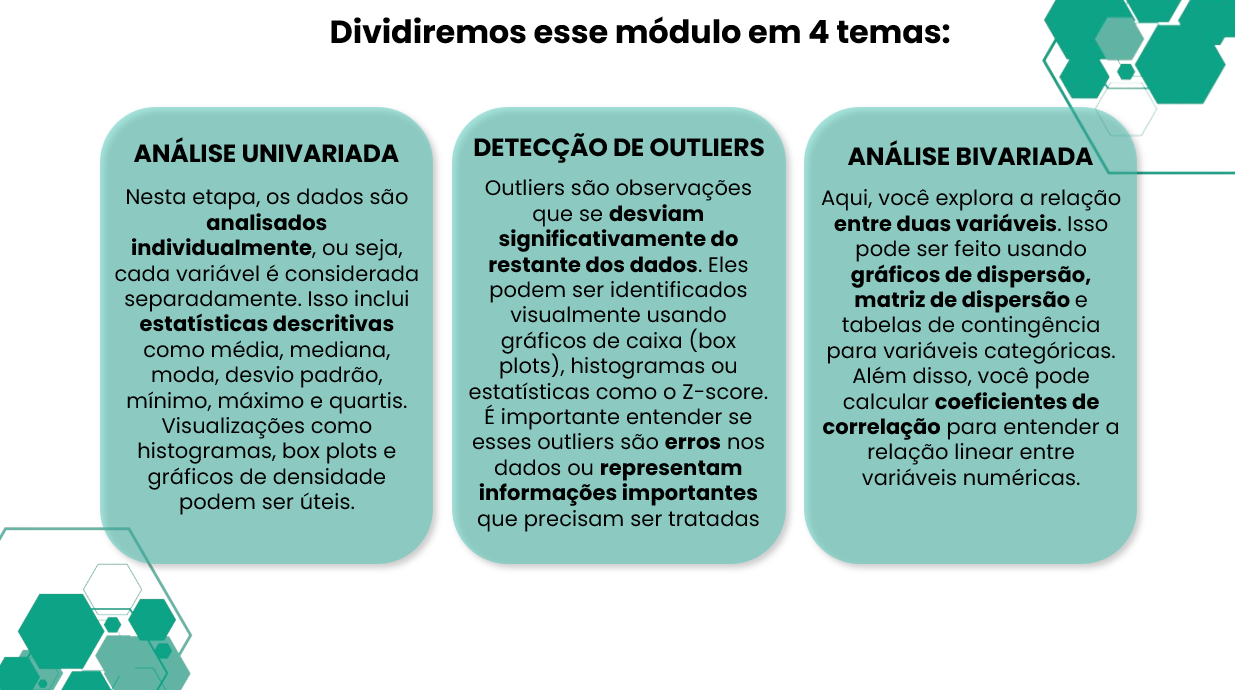

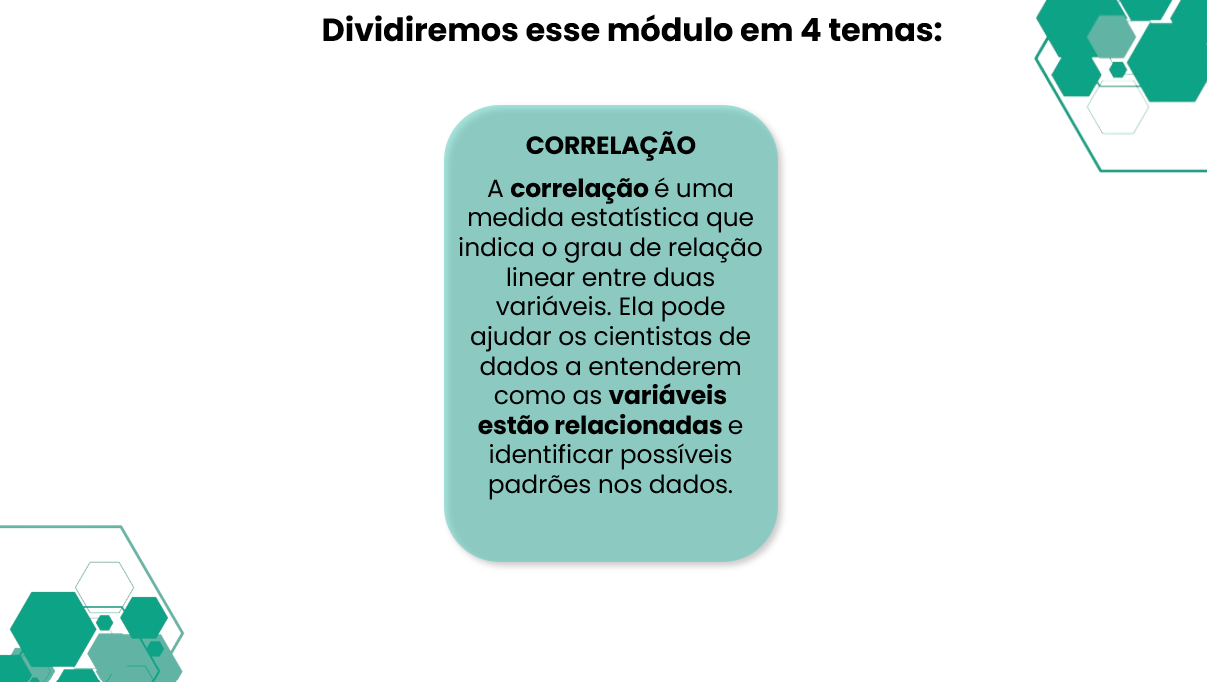

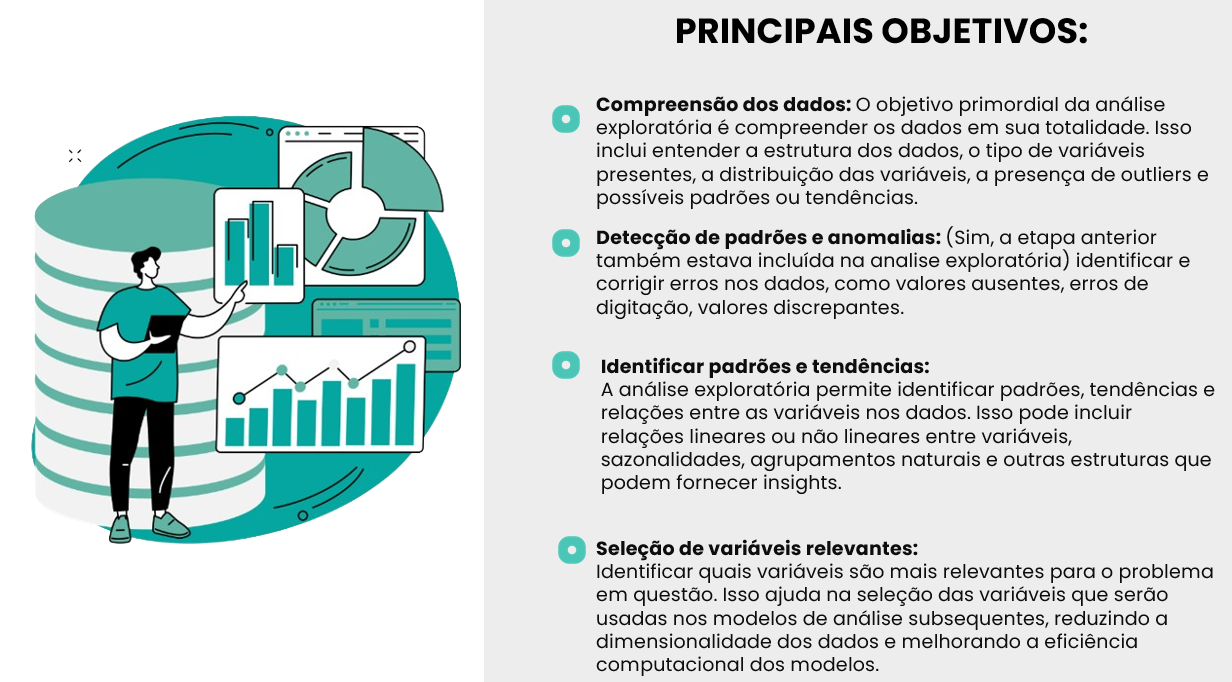

Para inciarmos precisaremos salvar a base que realizamos o pré processamento no módulo passado para aplicar nossa análise na base já pré processada.
As etapas são em cascata, sempre aplicamos em sequência os passos na base já utilizada.  

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Agora que já tenho minha base, irei ler ela por aqui!
df = pd.read_csv("CHURN_CREDIT_MOD08_PART2.csv", delimiter=',')

df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'CHURN_CREDIT_MOD08_PART2.csv'

In [3]:
df.dtypes

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

Credit_Score     0
Pais             0
Genero           0
Idade            0
Tempo_Credito    0
Balanco          0
Qtd_Produtos     0
Possui_Cartao    0
Membro_Ativo     0
Salario_Anual    0
Churn            0
dtype: int64

# **MÓDULO 15 - AULA 2**
# Análise Univariada

**Passo 1:**
Estatísticas Descritivas: Calcule estatísticas descritivas básicas para resumir a distribuição da variável, como média, mediana, moda, desvio padrão, mínimo, máximo e quartis.



In [ ]:
#A função describe é uma excelente função para dar um panorama das nossas variáveis QUANTITATIVAS (numéricas), ela dá uma visão geral
df.describe()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
count,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,9.970800e+04,99708.000000
mean,656.504283,38.144095,5.027992,55594.901735,1.553777,0.755406,0.497422,4.214435e+06,0.211457
std,80.280520,8.818943,2.806751,62789.275840,0.547746,0.429849,0.499996,5.531445e+06,0.408344
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.158000e+03,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.011687e+06,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.011687e+06,0.000000
75%,710.000000,42.000000,7.000000,119859.537500,2.000000,1.000000,1.000000,6.444375e+06,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,3.819017e+07,1.000000


Através da função describe já conseguimos até antecipar um passo e começar a entender as variáveis que tem outliers, mas avançaremos mais na próxima aula no tratamento dessas variáveis.

As variáveis Possui_Cartão, Membro Atibo e Churn não necessitam estarem no nosso describe, apesar de conterem valores numericos são booleanas.
Só variam entre 0 e 1.

Nessa etapa precisamos ser criticos, notem que a variável balanço parece ter uma distribuição muito anormal, vamos analisar mais a fundo ela.

**Passo 2:**

Aprofundamento nas variáveis com comportamento "estranho".

In [ ]:
#verificando quantidade de linhas com o dado igual a 0 (relembrando que aula passada notamos que de fato essa variavel não tinha to)
(df['Balanco'] == 0).sum()

54033

In [ ]:
(df['Balanco'] == 0).mean() * 100

54.19123841617524

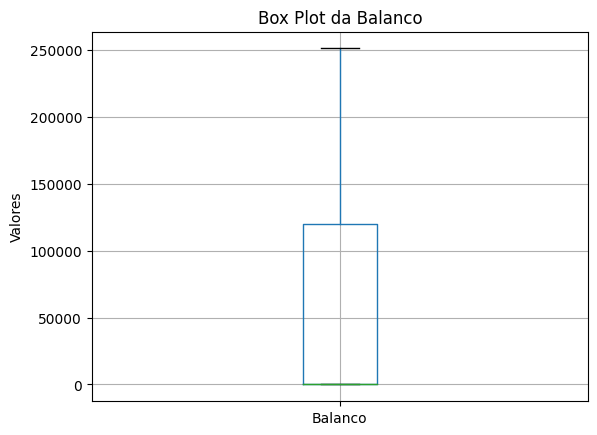

In [ ]:
df.boxplot(column='Balanco')
plt.title('Box Plot da Balanco')
plt.ylabel('Valores')
plt.show()

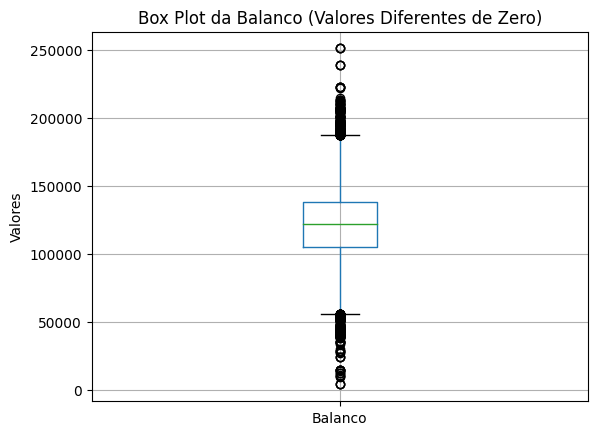

In [ ]:
#nesse trecho do nosso código iremos selecionar os valores da coluna balanco que são diferentes de 0
df_nao_zero = df[df['Balanco'] != 0]
df_nao_zero.boxplot(column='Balanco')
plt.title('Box Plot da Balanco (Valores Diferentes de Zero)')
plt.ylabel('Valores')
plt.show()

Notamos que temos forte presença de valores fora da normalidade dos dados, apesar desses dados a distribuição dos demais dados é bem equilibrada.

A variável 	Qtd_Produtos também parece ter um comportamento diferente, sua média está um pouco mais distante dos 50% dos dados:

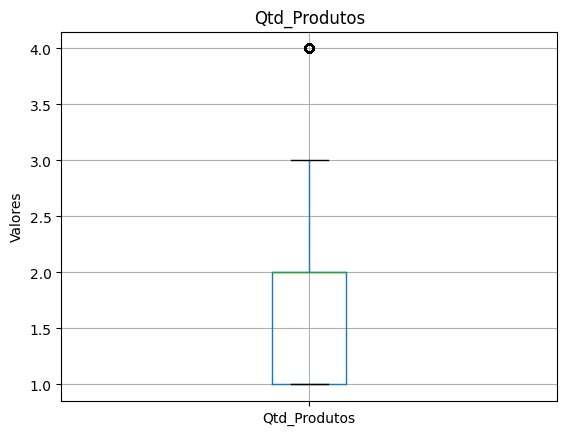

In [ ]:
df.boxplot(column='Qtd_Produtos')
plt.title('Qtd_Produtos')
plt.ylabel('Valores')
plt.show()

Notem que a distribuição é pouco proporcional, muitos valores abaixo de 1.5 e outliers acima de 3.0

Vamos comparar com o boxplot de uma variável que parece estar melhor distribuida:

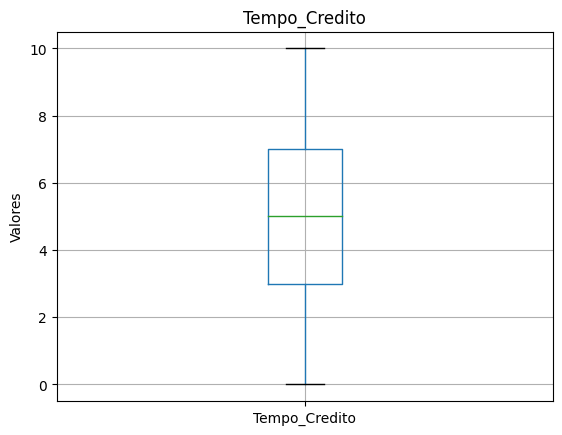

In [ ]:
df.boxplot(column='Tempo_Credito')
plt.title('Tempo_Credito')
plt.ylabel('Valores')
plt.show()

Notem como o boxplot tem um comportamento esperado, existe proporcionalidade entre a distribuição dos dados, sem presença de outliers.

**Passo 3:**

Analisando as variáveis booleanas.

É muito importante verificarmos a distribuição das variáveis com valores booleanos (1 e 0), saber se as distribuições são balanceadas e se alguma categoria acaba tendo baixa relevância.

Text(0, 0.5, 'Frequência')

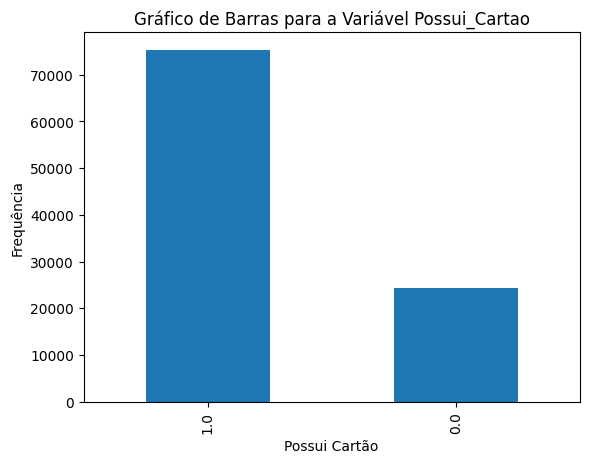

In [ ]:
# Contagem dos valores da coluna de possui_cartao
contagem_cartao = df['Possui_Cartao'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_cartao = (contagem_cartao / contagem_cartao.sum()) * 100
ax = contagem_cartao.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Possui_Cartao')
plt.xlabel('Possui Cartão')
plt.ylabel('Frequência')

In [ ]:
# Contando as ocorrências
contagem_cartao = df['Possui_Cartao'].value_counts()

# Calculando a porcentagem
(contagem_cartao / contagem_cartao.sum()) * 100

1.0    75.540578
0.0    24.459422
Name: Possui_Cartao, dtype: float64

Notamos que para a variável de possui cartão a grande maioria dos nossos clientes possui esse produto (cerca de 75% da nossa base).

Text(0, 0.5, 'Frequência')

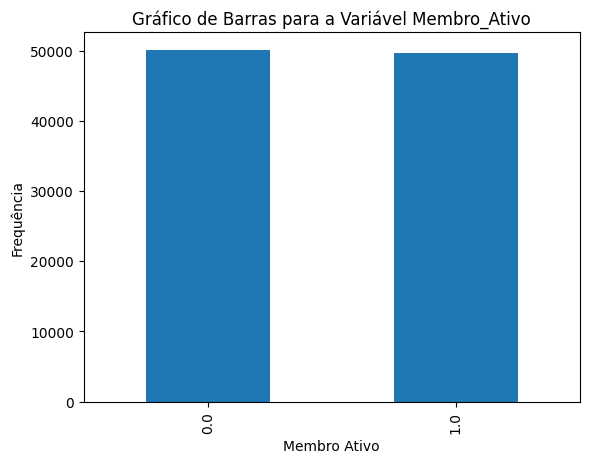

In [ ]:
#Membro_Ativo
contagem_membro = df['Membro_Ativo'].value_counts()

porcentagem_membro = (contagem_membro / contagem_membro.sum()) * 100
ax = contagem_membro.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Membro_Ativo')
plt.xlabel('Membro Ativo')
plt.ylabel('Frequência')

In [ ]:
contagem_membro = df['Membro_Ativo'].value_counts()
(contagem_membro / contagem_membro.sum()) * 100

0.0    50.257753
1.0    49.742247
Name: Membro_Ativo, dtype: float64

Já na variável de membro ativo notamos um balanceamento entre as duas classes. É bem interessante pois apesar de ambas serem variáveis booleanas afetaram nossos modelos de forma diferente.

* **Classe majoritária:** Quando temos o primeiro caso em que existe uma classe majoritária, ou seja nosso modelo pode tendenciar mais em direção a essa classe.

* **Classes balanceadas:** no caso de variáveis balanceadas elas são geralmente mais interessantes para o aprendizado do modelo pois o modelo pode aprender com maior facilidade a relação dessas classes com o Churn (variável que tentaremos prever).

Agora vamos avaliar nossa variável mais importante, Churn, que é a variável que dentro de alguns módulos tentaremos realizar a previsão.

Text(0, 0.5, 'Frequência')

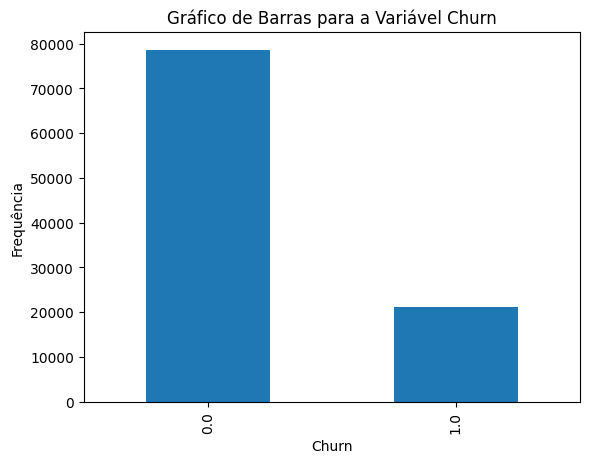

In [ ]:
contagem_churn = df['Churn'].value_counts()

porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100
ax = contagem_churn.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')

In [ ]:
contagem_churn = df['Churn'].value_counts()
(contagem_churn / contagem_churn.sum()) * 100

0.0    78.854254
1.0    21.145746
Name: Churn, dtype: float64

Nós identificamos então que a variável principal também tem um desbalanceamento. Esse ponto é muito importante e no módulo **Balanceamento, Variáveis Categóricas  - A Terceira etapa Pré Modelagem** aprenderemos como trabalhar com esses casos e obter o melhor resultado possível. Nessa etapa apenas estamos identificando.

**Passo 4:**

Analisando as variáveis categóricas.

Também necessitamos verificar de forma individualmente qual o comportamento da distribuição das variáveis categóricas.

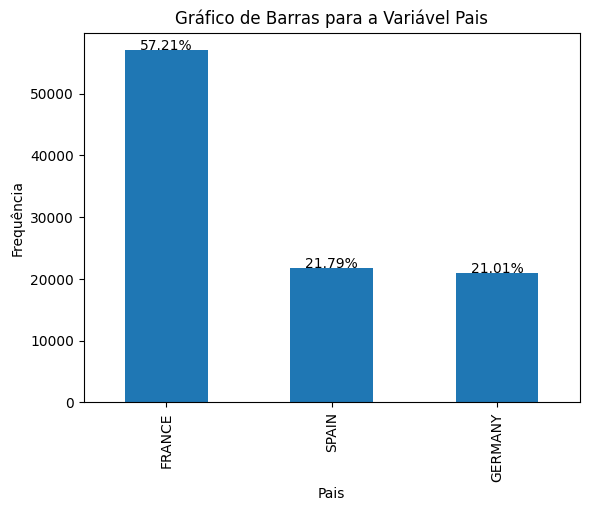

In [ ]:
# Calculando as porcentagens
contagem = df['Pais'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Pais')
plt.xlabel('Pais')
plt.ylabel('Frequência')

plt.show()

É possível identificarmos que a maioria dos nossos clientes estão cituados na França. Nenhuma das variáveis tem uma % muito baixa, o que seria preocupante para previsão.

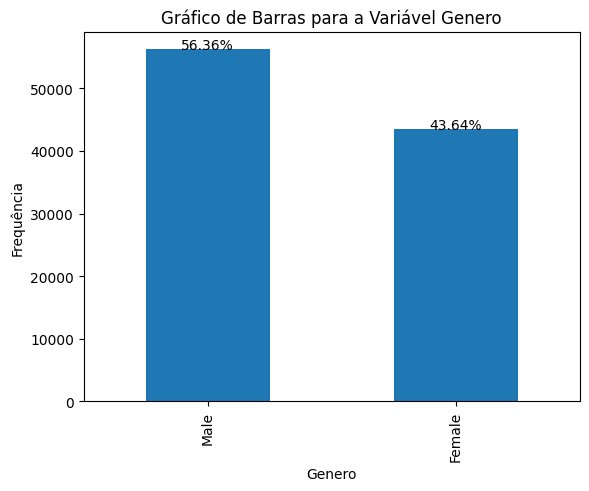

In [ ]:
contagem = df['Genero'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')

plt.show()

A questão de genero é bem equilibrada, temos clientes homens e mulheres.

Vamos pontuar os principais insights que retiramos dessa primeira análise univariada:

* Tanto a variável balanco quanto Qtd_Produtos possuem muitos outliers.

* A grande maioria dos nossos clientes possui cartão de crédito.

* Temos uma quantidade muito parecida de membros ativos e não ativos.

* A maioria dos nossos clientes está cituado na França.

* A proporção de mulheres e homens é bem semelhante.

# **MÓDULO 15 - AULA 3**
# Detectando Outliers

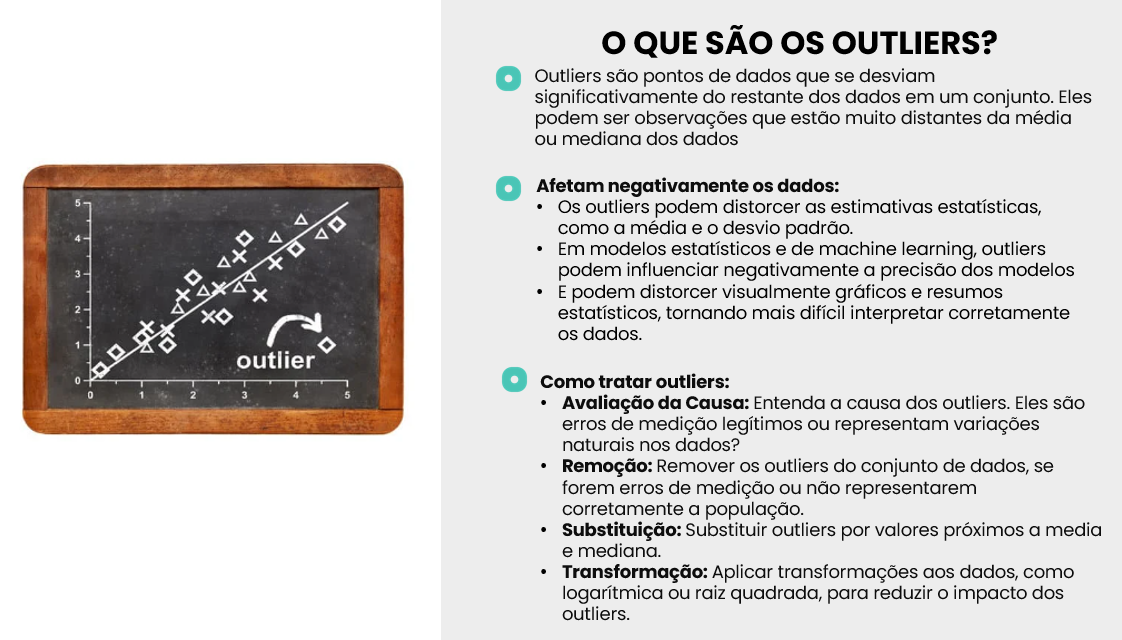

Atenção é necessário analisar muito bem antes de remover ou substituir outliers.

Imaginem que identificamos na nossa base que um ou dois clientes tem uma renda muito acima dos outros, se apenas removermos da nossa bases esses casos nosso modelo não será capaz de realizar uma boa previsão quando se deparar com clientes com uma renda alta. É necessário parcimônia e análise.


**Outlier variável Balanco:**

Na aula passada identificamos a presença de outliers na variavel de balanço.
Nessa aula iremos verificar se os outliers são casos isolados, se são possíveis erros de digitação e se devem ser removidos ou não.

In [ ]:
import plotly.express as px

In [ ]:
df_nao_zero = df[df['Balanco'] != 0]

fig = px.box(df_nao_zero, y='Balanco', title='Box Plot da Balanco (Valores Diferentes de Zero)', labels={'Balanco': 'Valores'})
fig.show()

Vamos começar verificando os valores que estão acima de 180000:

In [ ]:
#visualizando as ocorrencias onde balanco > 1800000
df[df['Balanco'] > 186000]

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
315,673,SPAIN,Female,23.0,1,186813.76,2,0.0,1.0,1011687.0,0.0
939,498,SPAIN,Male,26.0,1,198113.86,1,1.0,0.0,1011687.0,0.0
1142,771,SPAIN,Female,26.0,5,193354.86,2,1.0,0.0,1011687.0,0.0
1174,564,SPAIN,Male,26.0,3,187294.46,1,0.0,1.0,1011687.0,0.0
1866,850,SPAIN,Male,28.0,9,206014.94,2,0.0,1.0,1011687.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97828,550,FRANCE,Female,58.0,4,207034.96,4,1.0,0.0,15769476.0,1.0
98106,662,FRANCE,Female,59.0,7,187911.55,1,0.0,0.0,235315.0,1.0
98695,539,FRANCE,Male,62.0,4,186825.57,1,1.0,1.0,12782525.0,1.0
98869,682,FRANCE,Male,63.0,4,207034.96,1,0.0,0.0,15739757.0,1.0


In [ ]:
print("Porcentagem de registros onde 'balanco' > 186000:",
      (len(df[df['Balanco'] > 186000]) / len(df)) * 100)

Porcentagem de registros onde 'balanco' > 186000: 0.2306735668151001


Temos um volume baixo de dados com esses valores, mas olhando os registros não parece ter um padrão que demonstre falha de digitação.
Vale lembrar que nessa mesma coluna temos forte presença de valores não preenchidos, 0.
**Outliers são tantos valores acima ou abaixo da média!**

No caso dessa variavel que já apresenta inconsistência com dados faltantes não removeremos os outliers pois isso implicarei em remover e substituir os quase 50% de dados não preenchidos.
Quando formos rodar nosso modelo teremos a opção de não utilizar essa coluna com outliers caso seus dados reduzam o desempenho do modelo.

**Caso optassemos por remover ou substituir os valores dos ourliers (sem afetar os valores que são 0):**

In [ ]:
#Vamos fazer uma cópia do df pois não iremos trabalhar agora com os dados alterados, é apenas uma demonstração:
df_novo = df.copy()

# Abaixo criamos os quartis do boxplot, para remover aqueles que estão nos quartis desejados
Q1 = df_novo['Balanco'].quantile(0.25)
Q3 = df_novo['Balanco'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df_novo[(df_novo['Balanco'] >= limite_inferior) & (df_novo['Balanco'] <= limite_superior)]

# Calculando a mediana dos dados sem os valores maiores que 186000
mediana_sem_outliers = df_sem_outliers['Balanco'].median()

# Substituindo os valores maiores que 186000 pela mediana no novo DataFrame
df_novo.loc[df_novo['Balanco'] > 186000, 'Balanco'] = mediana_sem_outliers

In [ ]:
df_nao_zero = df[df['Balanco'] != 0]

fig = px.box(df_nao_zero, y='Balanco', title='Box Plot da Balanco (Valores Diferentes de Zero)', labels={'Balanco': 'Valores'})
fig.show()

**Outlier variável Qtde_Produto:**

In [ ]:
#Qtd_Produtos
fig = px.box(df, y='Qtd_Produtos', title='Box Plot da Qtde_Produtos', labels={'Qtd_Produtos': 'Valores'})
fig.show()

In [ ]:
# Vamos verificar a distribuição das categorias
df['Qtd_Produtos'].value_counts(normalize=True) * 100

2    51.003931
1    46.962129
3     1.728046
4     0.305893
Name: Qtd_Produtos, dtype: float64

Notem que para essa variável temos uma variação entre 1 produto e 4, como os clientes com 4 produtos estão em menor número nosso boxplot já indica como um outlier. Mas olhando analiticamente não faz sentido removermos por ser um valor muito próximo aos demais.
Optariamos pela remoção ou substituição caso tivessemos um valor muito fora da curva como 10/20 produtos.

Durante os módulos de regressão nos aprofundaremos em mais técnicas para verificação de outliers, por enquanto as técnicas de substituição, remoção ou a opção de manter os dados no data frame são suficientes para seguirmos com bom embasamento técnico.

# **MÓDULO 15 - AULA 4**
# Análise Bivariada

Durante a aula de análise univariada nos aprofundamentos em avaliar as variáveis individualmente.
Mas quando falamos de modelos de machine learning e análises estamos falando principalmente da relação entre duas variáveis ou mais.
Para isso é importante conhecermos a relação entre as variáveis e como é seu comportamento em detrimento de outra variável.

Nesse momento responderemos perguntas como:


*   Mulheres estão mais propensas a churn que homens?
*   Os clientes franceses costumam contratar mais produtos que os demais?
* Em qual pais temos tido maior % de churn?
* Qual idade tendemos a ter mais churn?

Focaremos principalmente em perguntas relacionadas a variável churn, pois como sabem, ao aplicarmos um modelo de machine learning é essa variável que iremos predizer.




In [ ]:
df.head()

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,SPAIN,Male,18.0,5,134796.87,2,1.0,0.0,1011687.0,0.0
1,644,SPAIN,Female,18.0,7,0.00,1,0.0,1.0,1011687.0,0.0
2,641,SPAIN,Male,18.0,1,0.00,2,0.0,1.0,1011687.0,0.0
3,826,SPAIN,Male,18.0,2,0.00,2,0.0,1.0,1011687.0,0.0
4,774,SPAIN,Female,18.0,1,185891.54,1,1.0,0.0,1011687.0,0.0


**Variável Genero x Churn:**

In [ ]:
fig = px.histogram(df, x='Churn', color='Genero', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Gênero',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Gênero')
fig.show()

In [ ]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['Churn', 'Genero']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn', y='percent', color='Genero', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Genero': 'Gênero'})

fig.update_layout(title='Relação entre Churn e Gênero',
                  yaxis_title='Porcentagem',
                  legend_title='Gênero')
fig.show()

Conseguimos verificar uma predominância em churns quando falamos de mulheres.
Então elas tendem a abondonar mais nossa empresa.
Isso também indica que quando formor tentar prever o churn essa variável poderá ser um forte indicador.

**Variável Pais x Churn:**

In [ ]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['Churn', 'Pais']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn', y='percent', color='Pais', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Pais': 'Pais'})

fig.update_layout(title='Relação entre Churn e Pais',
                  yaxis_title='Porcentagem',
                  legend_title='Pais')
fig.show()

Apesar da frança representar a maior parte dos nossos clientes, quando olhando para Churn representa apenas 44% dos dados. Enquanto que Germany representa 16% dos clientes sem churn e incríveis 37% de clientes com churn.

**Variável Pais x Quantidade Produtos:**

In [ ]:
# Calculando a mediana de produtos por país
media_produtos_por_pais = df.groupby('Pais')['Qtd_Produtos'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(media_produtos_por_pais, x='Pais', y='Qtd_Produtos',
             title='Média de Produtos por País',
             labels={'Qtd_Produtos': 'Média de Produtos', 'Pais': 'País'})
fig.show()

De fato os clientes cituados na alemanha parecem ter um menor engajamento com nossa empresa. Também tem uma menor mediana de quantidade de produtos.

**Variável Churn x Idade:**

In [ ]:
mediana = df.groupby('Churn')['Idade'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(mediana, x='Churn', y='Idade',
             title='Média Idade Churn')
fig.show()

Podemos inferir que clientes mais velhos estão mais propensos a darem Churn.

**Membro ativo x Churn:**

Temos uma forte tendência a creditar que membros que não estão ativos na nossa marca são mais propensos ao churn, vamos analisar essa hipótese:

In [ ]:
fig = px.histogram(df, x='Churn', color='Membro_Ativo', barmode='stack')
fig.update_layout(title='Relação entre Churn e Membro Ativo',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Membro_Ativo')
fig.show()

**Mediana do Salario x Churn:**

In [ ]:
mediana = df.groupby('Churn')['Salario_Anual'].median().reset_index()
fig = px.bar(mediana, x='Churn', y='Salario_Anual',
             title='Média Salario_Anual Churn')
fig.show()

A questão da mediana do salário parece não influenciar no churn ou não.

Dica: Uma variável que não parece estar diretamente relacionada à variável principal (preditora) pode, na verdade, ser altamente informativa quando combinada com outras variáveis.

Existem várias situações em que isso pode ocorrer:

**Variáveis de interação:** Duas variáveis podem não ter uma relação direta com a variável principal, mas sua interação pode ser significativa. Por exemplo, em um modelo de previsão de vendas, a estação do ano pode não ter uma relação direta com as vendas, mas a interação entre a estação do ano e o tipo de produto pode ser importante.

**Variáveis mediadoras:** Uma variável pode não ter uma relação direta com a variável principal, mas pode afetar indiretamente a relação entre outras variáveis e a variável principal. Por exemplo, o nível de satisfação do cliente pode não estar diretamente relacionado às vendas, mas pode mediar a relação entre a qualidade do produto e as vendas.

**Variáveis de confusão:** Uma variável pode parecer não relacionada à variável principal, mas na verdade está correlacionada com uma variável que está relacionada à variável principal. Ignorar essa variável pode introduzir viés no modelo. Por exemplo, em um estudo sobre o impacto do exercício na saúde, o nível de atividade física pode ser uma variável de confusão se estiver correlacionado tanto com o exercício quanto com a saúde.

**Mediana do Salario x Pais:**

In [ ]:
mediana = df.groupby('Pais')['Salario_Anual'].median().reset_index()
fig = px.bar(mediana, x='Pais', y='Salario_Anual',
             title='Média Salario_Anual Pais')
fig.show()

**Mediana do Salario x Idade:**

In [ ]:
media_salario_por_idade = df.groupby('Idade')['Salario_Anual'].mean().reset_index()

fig = px.line(media_salario_por_idade, x='Idade', y='Salario_Anual',
              title='Relação entre Idade e Média de Salário',
              labels={'Idade': 'Idade', 'Salario_Anual': 'Média de Salário'})

fig.show()

Interessante o movimento que observamos onde temos alguns picos de salário aos 36 anos (provavelmente um outlier) e quanto mais velhos nossos clientes maiores são os picos de salário. Vemos estabilidade dos 40 aos 60.

**Insights que conseguimos retirar**

* Mulheres tem maior propensão a abandonarem nossos serviços
* Alemanhã é o principal país onde perdemos nossos clientes
* Clientes mais velhos são os mais propensos a deixarem os serviços
* Membros ativos abandonam menos a marca
* Clientes franceses tem uma média salarial superior
* Clientes mais velhos tem uma média salarial maior

Ainda poderiamos retirar muitos mais insights, quanto mais conhecermos nossos dados melhor para nós como profissionais.
Apenas dessa pequena análise já poderiamos inferir se um cliente está propenso a abandonar nossos serviços apenas pelo genero, pais e atividade.